### Analysis of an E-commerce Dataset

In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and I have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

    
#### Description of Fields

|Column|Meaning|
|:-----:|:-----:|
|userId|the user's id|
|gender|the user's gender|
|rating|the user's rating towards the item|
|review|the user's review towards the item|
|item|the item's name|
|category|the category of the item|
|helpfulness|the average helpfulness of this rating|
|timestamp|the timestamp when the rating is created|
|item_id|the item's id|
|item_price|the item's price|
|user_city|the city of user's birth|

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.


### Data Cleaning

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#columns = ['userId', 'gender', 'rating', 'review', 'item', 'category', 'helpfulness', 'timestamp', 'item_id', 'item_price', 'user_city']
table = pd.read_csv('The E-commerce Dataset.csv')
table.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [3]:
table.shape

(20000, 11)

In [4]:
table.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [5]:
table = table.dropna(subset=['gender', 'rating', 'helpfulness'])
table = table[table['review'] != 'none']

In [6]:
table.shape

(19916, 11)

#### Descriptive statistics

With the cleaned data, the data summarization will be provided as below:

* 1. total number of unique users, unique reviews, unique items, and unique categories
* 2. descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* 3. descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* 4. descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [7]:
#1
table['userId'].unique().size

8562

In [8]:
table['review'].unique().size

19459

In [9]:
table['item'].unique().size

89

In [10]:
table['category'].unique().size

9

In [11]:
#2
table['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [12]:
#3
table.groupby('gender').count()['item']

gender
F     9793
M    10123
Name: item, dtype: int64

In [13]:
table_gender = table.groupby('gender').count()['item'].reset_index(name='count')

In [14]:
table_gender['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

In [15]:
#4
table_item = table.groupby('item').count()['rating'].reset_index(name = 'count')

In [16]:
table_item['count'].describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64

#### Plotting and Analysis

In [17]:
table

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


<Axes: title={'center': 'rating'}, xlabel='gender'>

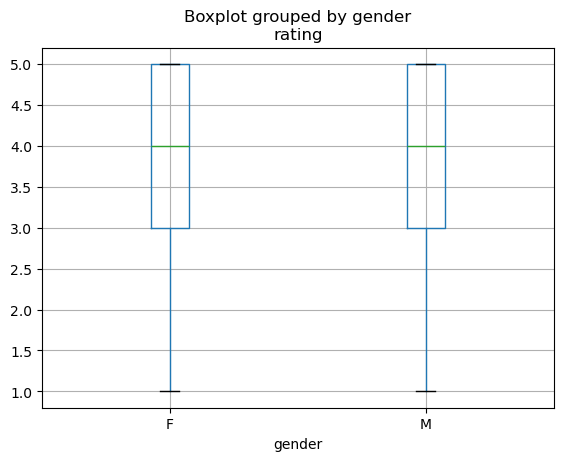

In [18]:
table.boxplot('rating', by = 'gender')

<Axes: title={'center': 'rating'}, xlabel='helpfulness'>

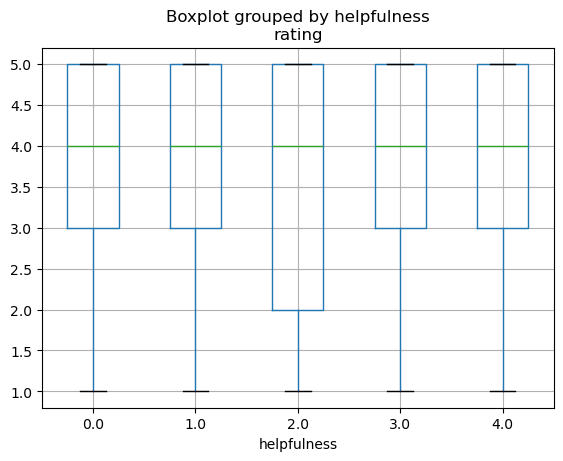

In [19]:
table.boxplot('rating', by = 'helpfulness')

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

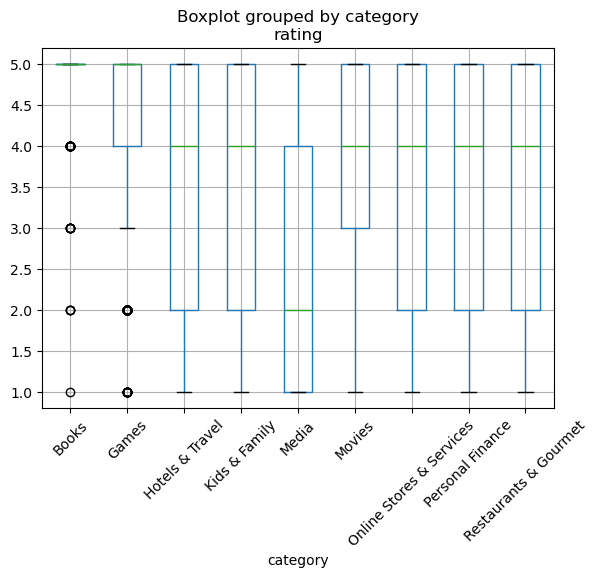

In [20]:
table.boxplot('rating', by = 'category')
plt.xticks(rotation = 45)

#### Detect and remove outliers

Define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

In [28]:
table_helpfulness = table.drop(table.index[table['helpfulness'] <= 2])
table_helpfulness

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [26]:

table_user = table_helpfulness.groupby('userId').count()['item'].reset_index(name = 'count')

In [30]:
list_7 = table_user[table_user["count"]<7]['userId'].tolist()
list_7

[0,
 1,
 2,
 3,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 39,
 40,
 42,
 43,
 44,
 47,
 48,
 49,
 53,
 54,
 55,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 76,
 77,
 79,
 80,
 83,
 84,
 85,
 88,
 90,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 112,
 113,
 115,
 117,
 118,
 121,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 132,
 133,
 136,
 138,
 139,
 141,
 142,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 176,
 177,
 181,
 182,
 183,
 184,
 186,
 187,
 189,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 215,
 217,
 219,
 220,
 222,
 223,
 224,
 225,
 227,
 228,
 230,
 231,
 234,
 236,
 237,
 238,
 239,
 240,
 242,
 246,
 247,
 248,
 250,
 251,
 252,
 

In [31]:
#remove the number of users who have less than 7 ratings
table_user = table_helpfulness.drop(table_helpfulness.index[table_helpfulness['userId'].isin(list_7)])
table_user

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [33]:
table_item = table.groupby('item').count()['rating'].reset_index(name = 'count')

In [34]:
list_11 = table_item[table_item['count']<11]['item'].tolist()
list_11

[]

In [35]:
#remove the number of items received less than 11 ratings
table_item = table_user.drop(table_user.index[table_user['item'].isin(list_11)])
table_item

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [36]:
table_item.shape

(2741, 11)